In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/topic_modelling_dataset


/content/drive/MyDrive/topic_modelling_dataset


In [3]:
!pip install pyLDAvis

In [ ]:
import pandas as pd
import numpy as np

#gensim importing
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

## NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#Plotting tools
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()

In [6]:
path = "/content/drive/MyDrive/topic_modelling_dataset/papers.csv" #given the path

In [7]:
df = pd.read_csv(path)
df

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...
...,...,...,...,...,...
9675,5452,2019,Discrete Object Generation with Reversible Ind...,The success of generative modeling in continuo...,Discrete Object Generation\n\nwith Reversible ...
9676,4799,2019,Adaptively Aligned Image Captioning via Adapti...,Recent neural models for image captioning usua...,Adaptively Aligned Image Captioning via\n\nAda...
9677,1827,2019,Fully Dynamic Consistent Facility Location,We consider classic clustering problems in ful...,Fully Dynamic Consistent Facility Location\n\n...
9678,8693,2019,Efficient Rematerialization for Deep Networks,"When training complex neural networks, memory ...",Efﬁcient Rematerialization for Deep Networks\n...


To check the nan values

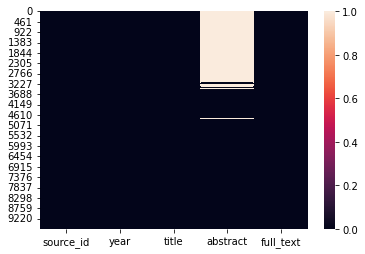

In [8]:
sns.heatmap(df.isna())

Here I am focusing on the title column only for topic modelling

In [11]:
data = df.title.values.tolist()
data[:1]

['Bit-Serial Neural Networks']

In [12]:
#tokenize the sentences to the words, deacc=True removes punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [13]:
#remove the stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [14]:
data_words = list(sent_to_words(data))
data_words[:1]

[['bit', 'serial', 'neural', 'networks']]

In [15]:
data_words_nostops = remove_stopwords(data_words)
data_words_nostops[:1]

[['bit', 'serial', 'neural', 'networks']]

In [16]:
#creating the dictionary
dictionary = corpora.Dictionary(data_words_nostops)
print('{} different terms in the corpus'.format(len(dictionary)))

6443 different terms in the corpus


In [17]:
text_data = data_words_nostops

In [18]:
#the bag of words object
corpus = [dictionary.doc2bow(text) for text in text_data]

In [19]:
#tfidf model
tfidf_model = models.TfidfModel(corpus) 
tfidf_corpus = tfidf_model[corpus]

In [20]:
# lda is unsupervised learning so there is no target topics, have to try with diffent number of topics 
#highest coherance value topic have to be choosen


def coherence_values(dictionary, data, corpus, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = lda_model = gensim.models.ldamodel.LdaModel(corpus = tfidf_corpus ,
                                           id2word = dictionary,
                                           num_topics = num_topics,
                                           random_state = 10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model,
                                        texts = data, 
                                        dictionary = dictionary,
                                        coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
start = 1; limit = 20; step = 1 # computing  the topic number from one to 20 nd 

model_list, coherence_values = coherence_values(dictionary = dictionary, 
                                                        data = text_data, corpus = tfidf_corpus, 
                                                        start = start, limit = limit,
                                                        step = step)

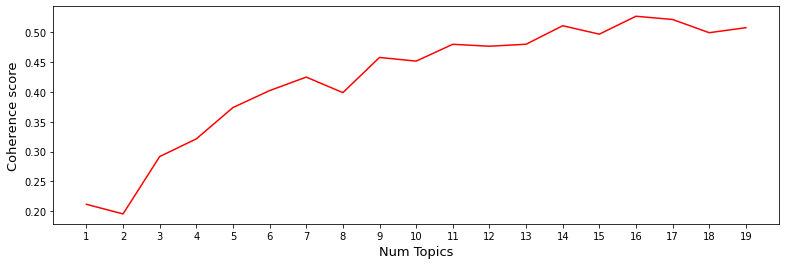

In [22]:
#plotting coherence value and the topic number
no_of_topics = range(start, limit, step)
plt.figure(figsize = (13, 4))
plt.plot(no_of_topics, coherence_values, color = 'red')
plt.xlabel("Num Topics", fontsize = 13)
plt.ylabel("Coherence score", fontsize = 13)
plt.xticks(no_of_topics)
plt.show()

In [23]:
#automatically selecting the coherance
dictonary_new = {m:cv for m, cv in zip(no_of_topics, coherence_values)}
dictonary_new

{1: 0.2115728514548624,
 2: 0.1954585540760991,
 3: 0.2916820628579701,
 4: 0.32126731477409937,
 5: 0.37387650213563495,
 6: 0.40225428326994767,
 7: 0.42490610442372967,
 8: 0.3988698463982665,
 9: 0.45785797258893723,
 10: 0.4516888815482315,
 11: 0.47993142988412923,
 12: 0.4766701845422234,
 13: 0.48000578256338183,
 14: 0.5110172377644615,
 15: 0.49690823324273875,
 16: 0.5269602783693945,
 17: 0.5214937310284277,
 18: 0.49936279486571344,
 19: 0.507769229563787}

In [24]:
import operator
var= max(dictonary_new.items(), key=operator.itemgetter(1))[0]
var

16


My opinion manully selecting the number of topics from the graph is better. Dataset used here is small, so we will not get the accurate topic. I tried my best to obtain the optimal topics

In [25]:
#optimal_model = model_list[var] # automatically selcting the best topic
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(var,formatted = True) # probabilty of each word belong to that topic
model_topics

[(0,
  '0.025*"adversarial" + 0.011*"learning" + 0.009*"transfer" + 0.008*"submodular" + 0.007*"embedding" + 0.007*"online" + 0.007*"consistent" + 0.007*"combinatorial" + 0.006*"multi" + 0.006*"deep"'),
 (1,
  '0.014*"policy" + 0.012*"latent" + 0.010*"structured" + 0.009*"language" + 0.008*"robustness" + 0.008*"prediction" + 0.007*"zero" + 0.007*"tensor" + 0.007*"optimization" + 0.007*"deep"'),
 (2,
  '0.013*"graph" + 0.011*"learning" + 0.010*"online" + 0.009*"robust" + 0.009*"communication" + 0.008*"matrix" + 0.008*"aware" + 0.008*"via" + 0.007*"factorization" + 0.007*"efficient"'),
 (3,
  '0.010*"semi" + 0.010*"learning" + 0.009*"bandit" + 0.009*"conditional" + 0.009*"supervised" + 0.007*"sequence" + 0.007*"networks" + 0.007*"testing" + 0.006*"neural" + 0.006*"fairness"'),
 (4,
  '0.010*"attention" + 0.010*"sampling" + 0.010*"graph" + 0.010*"learning" + 0.009*"semantic" + 0.009*"transport" + 0.009*"spectral" + 0.008*"self" + 0.008*"uncertainty" + 0.008*"task"'),
 (5,
  '0.014*"causal

In [26]:
lda_graph = pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)
lda_graph

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.153914  0.016951       1        1  12.553239
3      0.015676 -0.046570       2        1  12.395355
2     -0.062945  0.069715       3        1  10.519110
8      0.044583 -0.116775       4        1  10.437984
9      0.020622  0.092714       5        1  10.077017
6      0.016138 -0.029815       6        1   9.663474
4     -0.108580 -0.019184       7        1   9.211311
0     -0.063929  0.128624       8        1   8.723094
1      0.081035  0.017977       9        1   8.434876
5     -0.096514 -0.113638      10        1   7.984541, topic_info=             Term        Freq       Total Category  logprob  loglift
3458         deep  326.000000  326.000000  Default  30.0000  30.0000
3657  adversarial  170.000000  170.000000  Default  29.0000  29.0000
652         graph  177.000000  177.000000  Default  28.0000  28.0000
2210   generative  154.000000  154.000000  Default  27.0000  27.0000
40       gradient  178.000000  178.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1        networks   22.324060  370.170656  Topic10  -5.3958  -0.2806
470    prediction   19.752017  125.803846  Topic10  -5.5182   0.6762
10          multi   20.174480  183.429850  Topic10  -5.4971   0.3202
47        optimal   18.667703  167.229122  Topic10  -5.5747   0.3351
2834        games   18.062684   67.246181  Topic10  -5.6076   1.2132

[602 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1259      1  0.823790   abstraction
1259     10  0.045766   abstraction
1732      1  0.954668   accelerated
1480      4  0.904691  accelerating
4681      5  0.936830  acceleration
...     ...       ...           ...
3271      4  0.065953          wide
3271     10  0.857393          wide
3459      9  0.908415          wise
1998      3  0.877116         worst
791       9  0.942967          zero

[1324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 3, 9, 10, 7, 5, 1, 2, 6])